# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
#Importacao de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

import patsy
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [2]:
# Carregamento de dados
tips = load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [3]:
# 1. Matriz de design utilizando o Patsy sem o Intercept
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0 ', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        17:48:14   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sex[Male]          1.1999      0.242      4.952      0.000       0.723       1.677
sex[Female]        1.1965      0.229      5.215      0.000       0.744       1.648
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# 2. Remoção das variáveis smoker[T.No] e time[T.Dinner] pois têm valores-p maiores que 0.05, sugerindo que essas variáveis não são significantes
y, X = patsy.dmatrices('tip ~ sex + net_bill + 0 ', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           6.94e-22
Time:                        17:48:14   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[Male]       1.3382      0.185      7.218      0.000       0.973       1.703
sex[Female]     1.3232      0.185      7.149      0.000       0.959       1.688
net_bill        0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

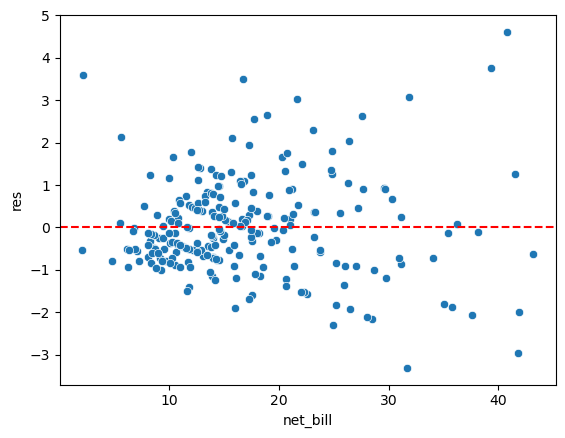

In [5]:
# 3. Gráfico de resíduos em função de net_bill
reg = smf.ols('tip ~ sex + net_bill', data = tips).fit()
reg.summary()
tips['res'] = reg.resid

sns.scatterplot(x= 'net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
# 4.1 Transformação net_bill no log 
y_log, X_log = patsy.dmatrices('tip ~ sex + np.log(net_bill)', tips)

modelo_log = sm.OLS(y_log,X_log).fit()
modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.30
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           5.54e-19
Time:                        17:48:14   Log-Likelihood:                -382.39
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     241   BIC:                             781.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2400      0.447     -2.772      0.006      -2.121      -0.359
sex[T.Female]       -0.0228      0.158     -0.145      0.885      -0.334       0.288
np.log(net_bill)     1.5661      0.158      9.895      0.000       1.254       1.878
==============================================================================
Omnibus:                       73.433   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.929
Skew:                           1.296   Prob(JB):                     4.76e-48
Kurtosis:                       6.836   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# 4.2 Transformação net_bill no polinomio
y_exp, X_exp = patsy.dmatrices('tip ~ sex + net_bill + I(net_bill**2)', tips)

modelo_exp = sm.OLS(y_exp,X_exp).fit()
modelo_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     40.20
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.39e-21
Time:                        17:48:14   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             758.6
Df Residuals:                     240   BIC:                             772.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0800      0.365      2.956      0.003       0.360       1.800
sex[T.Female]       -0.0099      0.154     -0.064      0.949      -0.312       0.293
net_bill             0.1287      0.037      3.471      0.001       0.056       0.202
I(net_bill ** 2)    -0.0007      0.001     -0.820      0.413      -0.002       0.001
==============================================================================
Omnibus:                       39.584   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.312
Skew:                           0.828   Prob(JB):                     1.63e-17
Kurtosis:                       5.205   Cond. No.                     2.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analise dos Modelos:

1. **Modelo com net_bill no Logaritmo** - R²: 0.295                           
2. **Modelo com net_bill Polinomial** - R²: 0.334
   
Com base nos critérios de R², o **modelo com transformação polinomial** parece ser a melhor escolha.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [8]:
#1.Matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip_pct, explicado por sex, smoker, diner e net_bill.
y_pct, X_pct = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 0', tips)

modelo = sm.OLS(y_pct,X_pct).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.85e-05
Time:                        17:48:14   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sex[Male]          0.3216      0.033      9.698      0.000       0.256       0.387
sex[Female]        0.3148      0.031     10.023      0.000       0.253       0.377
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#2.Remoção das variáveis não significantes.
y_pct, X_pct = patsy.dmatrices('tip_pct ~ net_bill + 0', tips)

modelo = sm.OLS(y_pct,X_pct).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                tip_pct   R-squared (uncentered):                   0.385
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              152.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                    1.76e-27
Time:                        17:48:14   Log-Likelihood:                          42.098
No. Observations:                 244   AIC:                                     -82.20
Df Residuals:                     243   BIC:                                     -78.70
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
net_bill       0.0087      0.001     12.338      0.000       0.007       0.010
==============================================================================
Omnibus:                      376.507   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79811.802
Skew:                           7.358   Prob(JB):                         0.00
Kurtosis:                      90.372   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

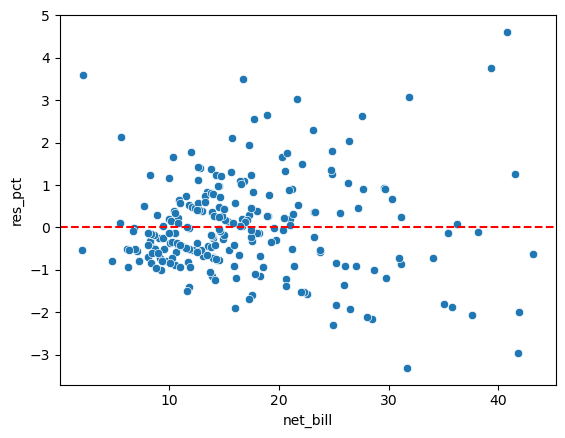

In [10]:
#3.Observe o gráfico de resíduos em função de net_bill
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_pct.summary()
tips['res_pct'] = reg.resid

sns.scatterplot(x= 'net_bill', y='res_pct', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [11]:
#4.Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# 4.1 Transformação net_bill no log 
y_pct_log, X_pct_log = patsy.dmatrices('tip_pct ~ np.log(net_bill)', tips)

modelo_pct_log = sm.OLS(y_pct_log,X_pct_log).fit()
modelo_pct_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.62e-13
Time:                        17:48:14   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 4.2 Transformação net_bill no polinomio
y_pct_exp, X_pct_exp = patsy.dmatrices('tip_pct ~ net_bill + I(net_bill**2)', tips)

modelo_pct_exp = sm.OLS(y_pct_exp,X_pct_exp).fit()
modelo_pct_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        17:48:14   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
I(net_bill ** 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. Do modelo final deste item, calcule o  𝑅2 na escala de tip_pct (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### Analise dos Modelos:

1. **Modelo do tip_pct com net_bill sem transformacao** - R²: 0.385                           
2. **Modelo do tip_pct com net_bill Polinomial** - R²: 0.158

3. **Modelo do tip_pct com net_bill no Logaritmo** - R²: 0.202
   
Com base nos critérios de R², o **modelo sem transformacao do net_bill** parece ser a melhor escolha.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [13]:
#Carregamento do arquivo de dados da previsao de renda
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [14]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [15]:
#Analise dos dtypes
df.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [16]:
#Verificação se há valores ausentes no banco de dados
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [17]:
#Tamanho do DataFrame
df.shape

(15000, 15)

In [18]:
#Exclusão dos dados ausentes
df1 = df.copy()
df1 = df1.dropna()
df1.isna().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [19]:
#1. Modelo de regressão linear simples (renda como variável resposta, por tempo_emprego como variável explicativa)
reg_renda = smf.ols('renda ~ tempo_emprego', data = df1).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

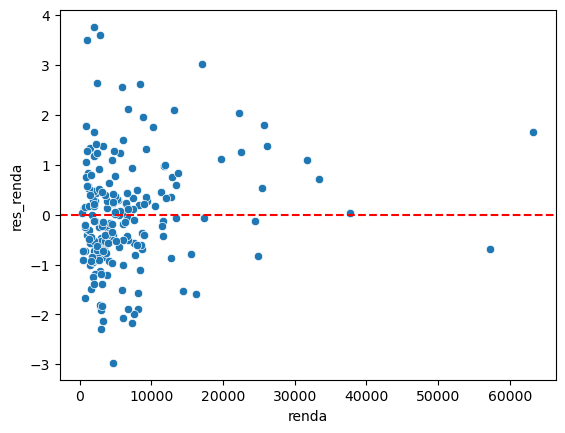

In [20]:
#2. Análise de resíduos
df1['res_renda'] = reg.resid
sns.scatterplot(x='renda', y='res_renda', data = df1)
plt.axhline(y=0, color='r', linestyle='--')

In [21]:
# AJuste de funçao logaritma de renda para analise
reg_renda_log = smf.ols('np.log(renda) ~ tempo_emprego', data = df1).fit()
reg_renda_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos notar que o R² aumentou um pouco com o novo modelo ajustando a funcao logaritmica de renda.

In [22]:
#3.Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
reg_m = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = df1).fit()
reg_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

In [23]:
#4.Remoçao das variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
reg_m_ = smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia', data = df1).fit()
reg_m_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     839.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2680.7376    409.502     -6.546      0.000   -3483.425   -1878.050
sexo[T.M]                6016.3560    146.130     41.171      0.000    5729.919    6302.793
posse_de_imovel[T.True]   384.0403    145.706      2.636      0.008      98.433     669.647
idade                      41.9666      8.070      5.201      0.000      26.149      57.784
tempo_emprego             549.8071     10.905     50.417      0.000     528.431     571.183
qt_pessoas_residencia     174.6714     76.140      2.294      0.022      25.426     323.917
==============================================================================
Omnibus:                    17509.753   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9684128.294
Skew:                           8.076   Prob(JB):                         0.00
Kurtosis:                     138.801   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretação dos parâmetros:

1. **sexo[T.M]**: 
   - Valor: 6016.3560
   - Este coeficiente indica que, em média, indivíduos do sexo masculino têm uma renda estimada R$ 6016,35 maior do que indivíduos do sexo feminino, mantendo todas as outras variáveis constantes.

2. **posse_de_imovel[T.True]**: 
   - Valor: 384.0403
   - Indivíduos que possuem um imóvel têm uma renda estimada R$ 384,04 maior do que aqueles que não possuem um imóvel, mantendo as outras variáveis constantes.

4. **idade**: 
   - Valor: 41.9666
   - Cada ano adicional de idade está associado a um aumento médio na renda de R$ 41,96, mantendo as outras variáveis constantes.

5. **tempo_emprego**: 
   - Valor: 549.8071
   - Para cada ano adicional de tempo de emprego, a renda estimada aumenta em média R$ 549,80, mantendo as outras variáveis constantes.

### Análise Geral:

- **Significância dos Coeficientes**: Todos os coeficientes apresentados têm valores de p (P>|t|) muito baixos (próximos de zero e menor que 0.005), indicando que são estatisticamente significantes. Isso significa que há uma forte evidência de que essas variáveis estão relacionadas com a renda.
- **Interpretação**: O tempo de emprego e o sexo parecem ter os impactos mais significativos na renda, com o tempo de emprego tendo o maior coeficiente, seguido pelo sexo masculino. A posse de imóvel e a idade também têm impactos positivos, mas menores em comparação ao tempo de emprego e sexo.


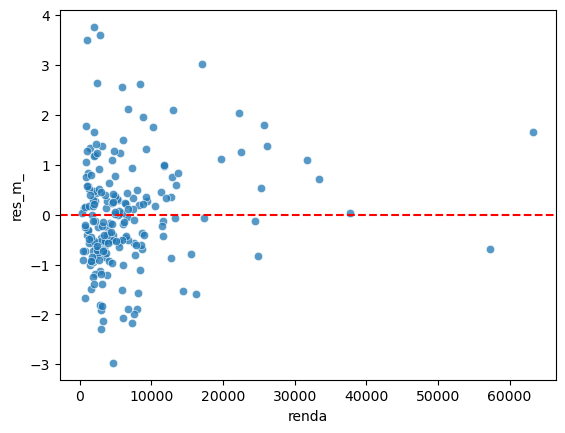

In [24]:
#5.Faça uma análise de resíduos. Avalie a qualidade do ajuste.
df1['res_m_'] = reg.resid

sns.scatterplot(x= 'renda', y= 'res_m_', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle = '--')

In [25]:
# Ajuste de um novo modelo de regressao com a transformacao da renda em Logaritmo indicando um melhor R² 
reg_m_log = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia', data = df1).fit()
reg_m_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1312.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:                -13682.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12421   BIC:                         2.742e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2198      0.039    186.234      0.000       7.144       7.296
sexo[T.M]                   0.7864      0.014     56.843      0.000       0.759       0.813
posse_de_imovel[T.True]     0.0887      0.014      6.428      0.000       0.062       0.116
idade                       0.0046      0.001      6.085      0.000       0.003       0.006
tempo_emprego               0.0609      0.001     59.037      0.000       0.059       0.063
qt_pessoas_residencia       0.0185      0.007      2.566      0.010       0.004       0.033
==============================================================================
Omnibus:                        1.184   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.162
Skew:                           0.023   Prob(JB):                        0.559
Kurtosis:                       3.014   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

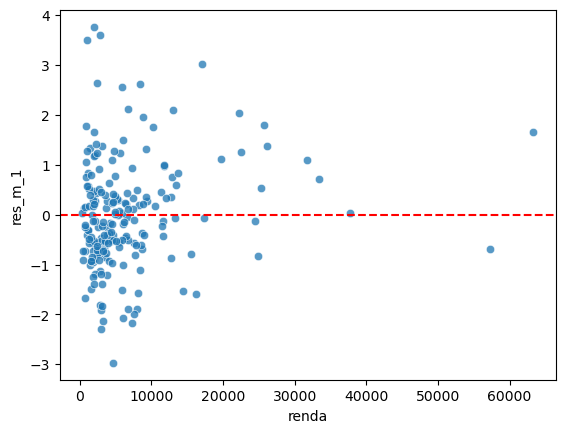

In [26]:
df1['res_m_1'] = reg.resid

sns.scatterplot(x= 'renda', y= 'res_m_1', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle = '--')